In [2]:
require(RTisean);
require(EMD);
require(tseriesChaos);
require(rgl);
require(fNonlinear);
require(TSDecomposition);
require(corrplot);
require(nonlinearTseries);

In [3]:
imagesFolder = 'images'

Time Series Components Example
===

In [41]:
stochastic    = rnorm(mean=0, sd=0.2, n=300);
deterministic = logistic(iter=300, r=3.8, x=0.5);
series = deterministic + stochastic;

pdf 
  2

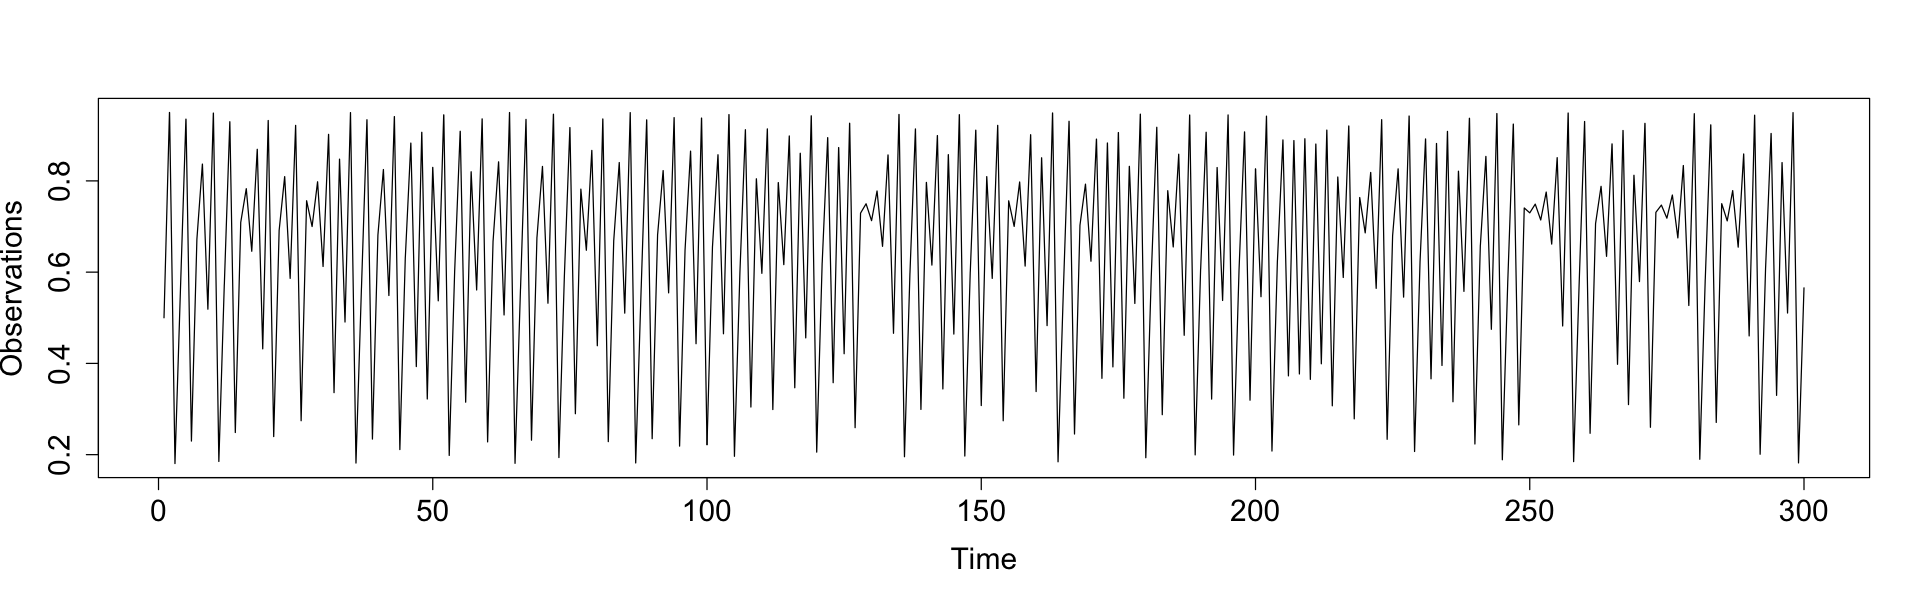

In [42]:
options(repr.plot.width=16, repr.plot.height=5)
plot(deterministic, t="l", axes = F, xlab="", ylab="")
title(sub="", xlab="Time", ylab="Observations", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"deterministicComponent.pdf", sep='/'), width=16, height=5)

pdf 
  2

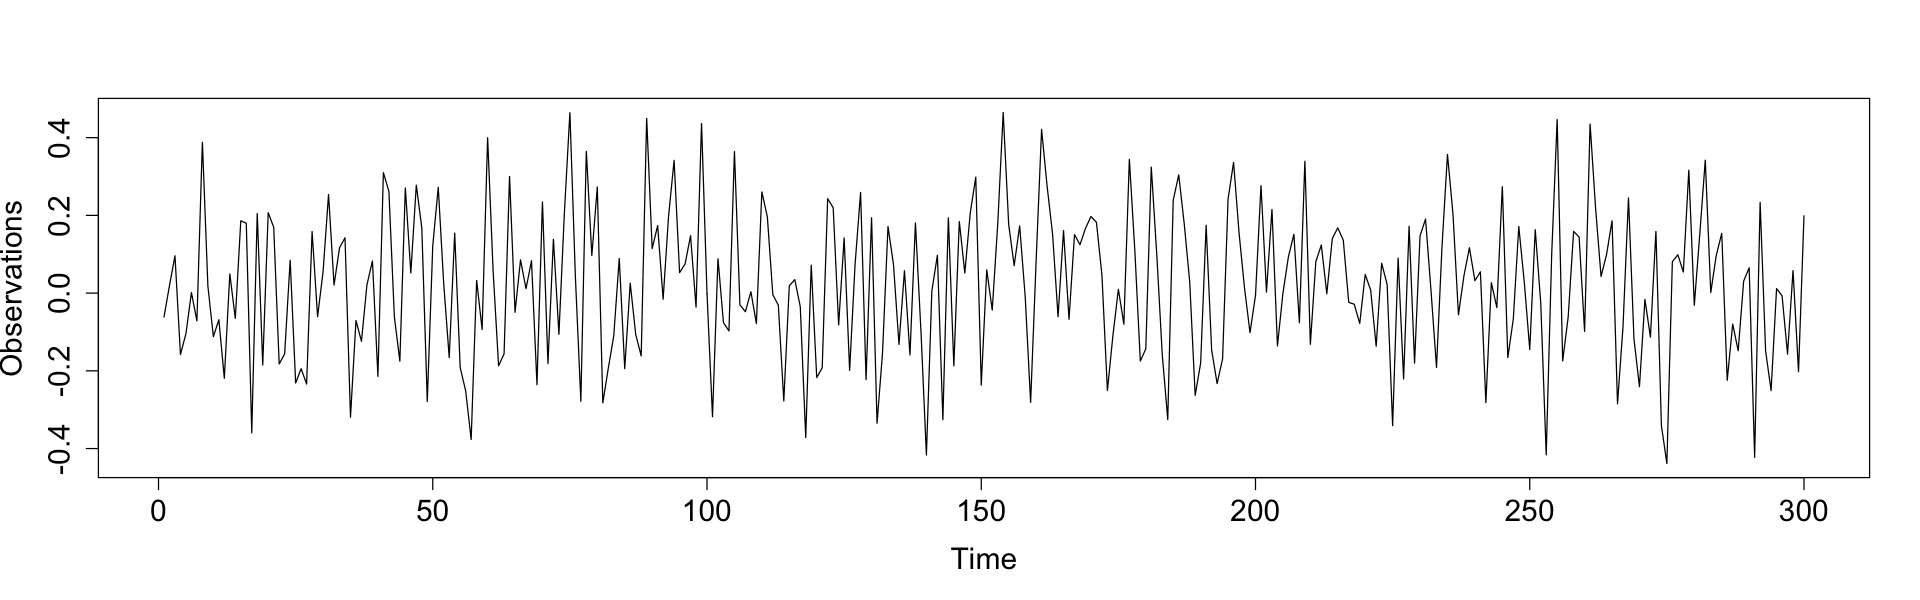

In [43]:
options(repr.plot.width=16, repr.plot.height=5)
plot(stochastic, t="l", axes = F, xlab="", ylab="")
title(sub="", xlab="Time", ylab="Observations", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"stochasticComponent.pdf", sep='/'), width=16, height=5)

pdf 
  2

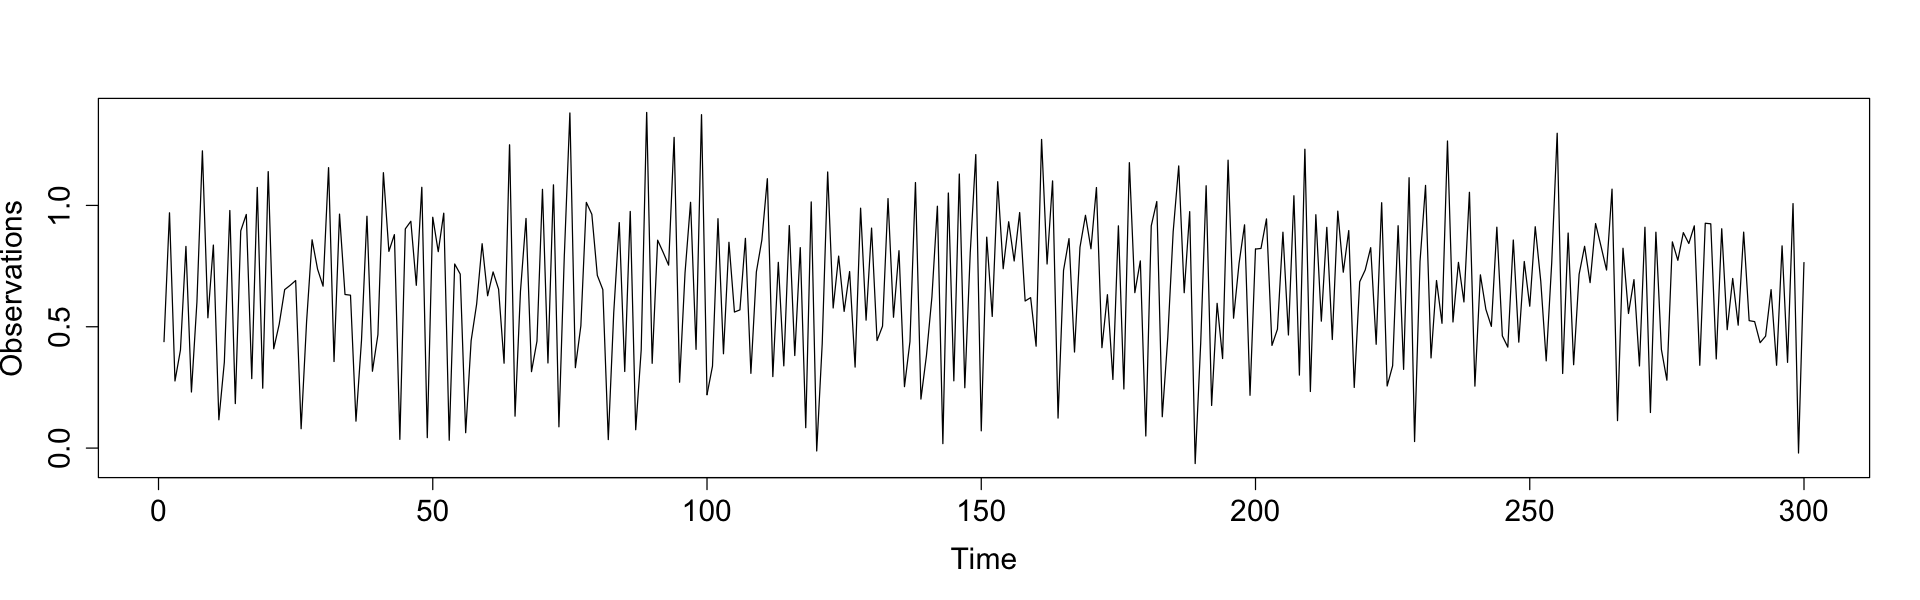

In [44]:
options(repr.plot.width=16, repr.plot.height=5)
plot(series, t="l", axes = F, xlab="", ylab="")
title(sub="", xlab="Time", ylab="Observations", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"series.pdf", sep='/'), width=16, height=5)

Stochastic influence over phase space
===

pdf 
  2

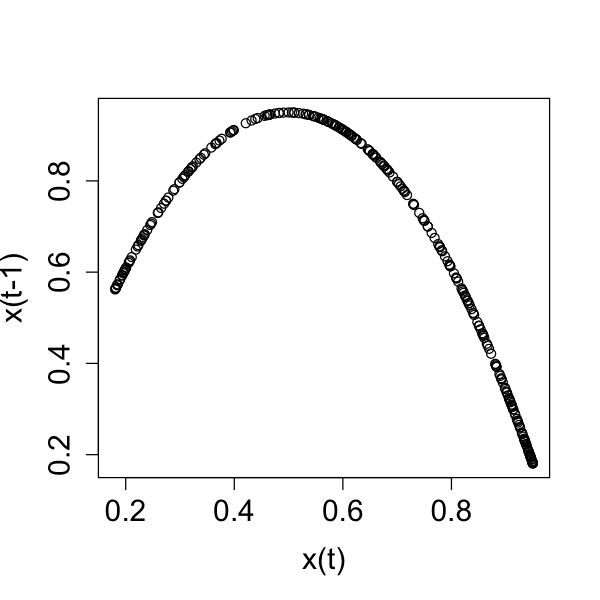

In [45]:
options(repr.plot.width=5, repr.plot.height=5)
plot(embedd(deterministic, m=2, d=1), t="p", axes = F, xlab="", ylab="")
title(sub="", xlab="x(t)", ylab="x(t-1)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"deterministicPhaseSpace.pdf", sep='/'), width=16, height=5)

pdf 
  2

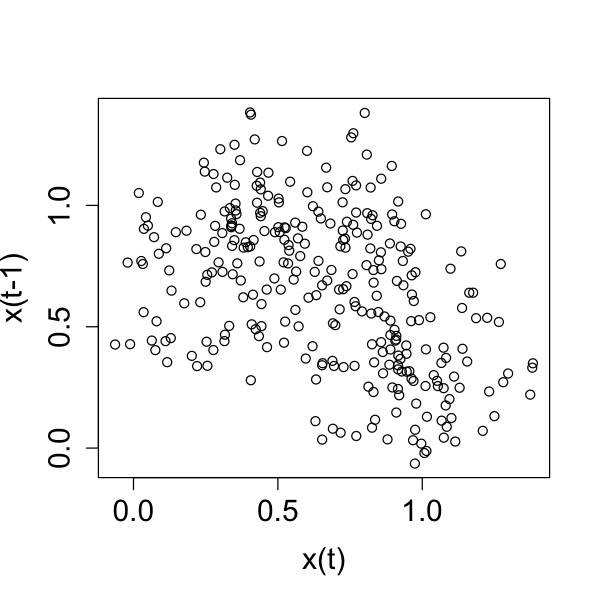

In [46]:
options(repr.plot.width=5, repr.plot.height=5)
plot(embedd(series, m=2, d=1), t="p", axes = F, xlab="", ylab="")
title(sub="", xlab="x(t)", ylab="x(t-1)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"seriesPhaseSpace.pdf", sep='/'), width=16, height=5)

In [62]:
layout(matrix(c(1,1,2,
                3,3,4,
                5,5,6,
                7,7,8,
                9,9,10), nrow=5, ncol=3, byrow = TRUE))

nAmostras = 1000

det = sin(2*pi*seq(0,9,len=1000))
plot(det, t="l", axes = FALSE)
title(xlab="Tempo", ylab="Observações", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
det.emb = embedd(det, 3, 3)
plot(det.emb, asp=1, axes = FALSE)
title(xlab="x(t)", ylab="x(t-3)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()

det = lorentzSim(doplot = FALSE, times  = seq(0, 50, by = (50/nAmostras)), parms  = c(sigma = 16, r = 45.92, b = 4), start  = c(-14, -13, 47))[,2][1:nAmostras]
plot(det, t="l", axes = FALSE)
title(xlab="Tempo", ylab="Observações", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
det.emb = embedd(det, 3, 1)
plot(det.emb, asp=1, axes = FALSE)
title(xlab="x(t)", ylab="x(t-1)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()

det = sim.cont(rossler.syst, start=0, end=650, dt=650/nAmostras, start.x=c(0,0,0), parms=c(0.15, 0.2, 10))[1:nAmostras]
plot(det, t="l", axes = FALSE)
title(xlab="Tempo", ylab="Observações", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
det.emb = embedd(det, 3, 1)
plot(det.emb, asp=1, axes = FALSE)
title(xlab="x(t)", ylab="x(t-1)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()

det = logistic(iter=nAmostras, x=0.5, r=3.8)
plot(det, t="l", axes = FALSE)
title(xlab="Tempo", ylab="Observações", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
det.emb = embedd(det, 3, 1)
plot(asp=1, axes = FALSE)
title(sub="", xlab="x(t)", ylab="x(t-1)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()

det = nonlinearTseries::henon(start=c(-0.006423277,-0.473545134), n.sample = nAmostras, n.transient=10, do.plot=FALSE)$x[1:nAmostras]
plot(det, t="l", axes = FALSE)
title(xlab="Tempo", ylab="Observações", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
det.emb = embedd(det, 3, 1)
plot(det.emb, asp=1, axes = FALSE)
title(xlab="x(t)", ylab="x(t-1)", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()

par(mfrow=c(1,1))
dev.copy2pdf(file = paste(imagesFolder,"deterministicSeries.pdf", sep='/'), width=15, height=22)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): argumento "x" ausente, sem padrão
